# Optimization HW 7.
## Conor Wallace bhd445

#### Problem Statement

The goal of this assignment was to find the optimial value $x^{*}$ such that the objective function given in eq. (1) was minimized. To achieve this, two gradient descent methods were used: steepest descent and newton's method. The gradient direction for each method can be seen in eq. (2) and (3) respectively. To ensure convergence, both methods were implemented using the backtracking line search algorithm to find the best step size at every iteration, as can be seen in eq. (4).

\begin{equation}
    \min{f(x_{1}, x_{2}) = 100(x_{2}-x_{1}^{2})^{2} + (1 - x_{1})^{2}} \quad (1)
\end{equation}

\begin{equation}
    \Delta x^{(k)} = −\nabla f(x^{(k)}) \quad (2)
\end{equation}

\begin{equation}
    \Delta x^{(k)} = −(\nabla^{2} f(x^{(k)})^{-1} \nabla f(x^{(k)}) \quad (3)
\end{equation}

\begin{equation}
    f(x^{(k)} + t \Delta x) < f(x^{(k)}) + \alpha t \nabla f(x^{(k)})^{T} \Delta x \quad (4)
\end{equation}

#### Code Review

The code below shows the approach taken to solve this problem. Several helper functions were created for ease of use. These include the objective function, the gradient and hessian matrices, and the gradient direction functions. Next is the main gradient descent algorithm. In this code block the minimization of both gradient methods is accomplished by way of two subsequent while loops. The gradient descent algorithm can be applied as follows.

__Require__: Starting point $x \in dom(f)$

__repeat__
> Compute search direction $\Delta x$

> Line search: Compute step size $t$

> Update: $x^{+} := x + t\Delta x$

> until convergence criterion is satisfied

As can be seen in the code, each of the two major while loops inside the gradient descent block compute the gradient descent of the two gradient methods by applying this algorithm. The nested while loops compute the backtracking line search for the step size $t$. The algorithm for backtracking can be seen below. Once these two descent methods have converged they return the optimal values $x*$ as well as some performance data for later plotting.

__Require__: Starting step size $t = 1$

__repeat__
> If $f(x^{(k)} + t \Delta x) < f(x^{(k)}) + \alpha t \nabla f(x^{(k)})^{T} \Delta x$, accept t and break

> Else: $t = \beta t$

#### Analysis

The maximum number of iterations for both descent methods was set to $50,000$ iterations. The backtracking parameters $\alpha$ and $\beta$ were set to $0.25$ and $0.25$ respectively. With these hyperparameters, the steepest descent algorithm was able to converge in $388$ iterations. The plot of its convergence and accepted step size as a function of time can be seen in Fig. (1). As can be seen, the algorithm stabilized within the first $50$ iterations, but took much longer to converge to our convergence criteria. Additionally, the trajectory of the optimization varibales can be seen in Fig. (2). With the same hyperparameters, newton's method was able to converge in only $38$ iterations. Fig. (3) shows a similar convergence and step size plot for newton's method. This gradient approach stabilizes in only $2$ iterations and requires several more to converge. The optimization variable trajectories for newton's method can be seen in Fig. (4).

| <img src="figures/sdc.png"> |
| :--: |
| <center>*Fig. (1) Steepest Descent Convergence*</center> |

| <img src="figures/sdx.png"> |
| :--: |
| <center>*Fig. (2) Steepest Descent Optimization Trajectory*</center> |

| <img src="figures/nmc.png"> |
| :--: |
| <center>*Fig. (3) Newton's Method Convergence*</center> |

| <img src="figures/nmx.png"> |
| :--: |
| <center>*Fig. (4) Newton's Method Optimization Trajectory*</center> |

### Package Dependencies

In [3]:
import numpy as np
from numpy.linalg import norm, inv
import matplotlib.pyplot as plt

### Helper Functions

In [4]:
def objective(x):
    f = 100*(x[1,0]-x[0,0]**2)**2+(1-x[0,0])**2
    return f

In [5]:
def gradient(x):
    dx1 = -400*x[1,0]*x[0,0] + 400*x[0,0]**3 - 2 + 2*x[0,0]
    dx2 = 200*x[1,0] - 200*x[0,0]**2
    grad = np.empty([len(x), 1])
    grad[0] = dx1
    grad[1] = dx2
    
    return grad

In [6]:
def hessian(x):
    dx1x1 = -400*(x[1,0]-x[0,0]**2)+800*x[0,0]**2+2
    dx1x2 = -400*x[0,0]
    dx2x1 = -400*x[0,0]
    dx2x2 = 200
    hessian = np.empty([len(x), len(x)])
    hessian[0, 0] = dx1x1
    hessian[0, 1] = dx1x2
    hessian[1, 0] = dx2x1
    hessian[1, 1] = dx2x2
    
    return hessian

In [7]:
def steepestDescent(x):
    gradf=gradient(x)
    dx = -gradf

    return dx, gradf

In [8]:
def newtonsMethod(x):
    gradf=gradient(x)
    hess = np.linalg.inv(hessian(x))
    dx = -np.dot(hess,gradf)
    
    return dx, gradf

### Gradient Descent Algorithm

In [12]:
def gradient_descent(x):
    steep_xstar = x
    steep_x = []
    steep_t = []
    steep_obj = []
    newton_xstar = x
    newton_x = []
    newton_t = []
    newton_obj = []
    threshold = 0.0001
    maxIter = 50000
    a = 0.25
    b = 0.25
    
    i = 0
    # Steepest Descent w/ backtracking
    while (norm(gradient(steep_xstar)) > threshold) and (i < maxIter):
        dx, gradf = steepestDescent(steep_xstar)

        t=1
        #f(x + t∆x) < f(x) + αt∇f(x)T ∆x
        while objective(steep_xstar + t*dx) > objective(steep_xstar)+a*t*np.dot(np.transpose(gradf), dx):
            t = b*t

        steep_x.append(steep_xstar)
        steep_t.append(t)
        steep_obj.append([i, objective(steep_xstar)])
        steep_xstar = steep_xstar + t*dx
        i = i + 1
        
    print "done with steepest descent"
    print("steepest descent converged in %s iterations" % len(steep_t))
    
    i = 0
    # Newton's Method w/ backtracking
    while (norm(gradient(newton_xstar)) > threshold) and (i < maxIter):
        dx, gradf = newtonsMethod(newton_xstar)
        
        t=1
        #f(x + t∆x) < f(x) + αt∇f(x)T ∆x
        while objective(newton_xstar + t*dx)>=objective(newton_xstar)+a*t*np.dot(np.reshape(gradient(newton_xstar),(1,2)),dx):
            t = b*t
            
        newton_x.append(newton_xstar)
        newton_t.append(t)
        newton_obj.append([i, objective(newton_xstar)])
        newton_xstar = newton_xstar + t*dx
        i = i + 1
    print "done with newton's method"
    print("newton's method converged in %s iterations" % i)
        
    return steep_xstar, newton_xstar, np.array(steep_x), np.array(steep_t), np.array(steep_obj), np.array(newton_x), np.array(newton_t), np.array(newton_obj)

In [13]:
x = np.empty([2, 1])
x[0,0] = -2
x[1,0] = 2
s_xstar, n_xstar, s_x, s_t, s_o, n_x, n_t, n_o = gradient_descent(x)
print "steepest descent x*: ", s_xstar
print "newtons method x*: ", n_xstar

done with steepest descent
steepest descent converged in 388 iterations
done with newton's method
newton's method converged in 38 iterations
steepest descent x*:  [[1.00010885]
 [1.00021815]]
newtons method x*:  [[1.]
 [1.]]


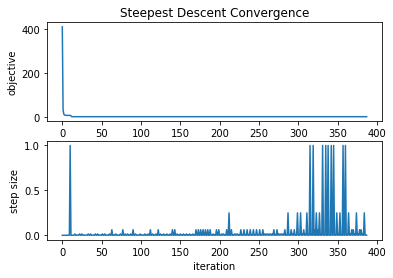

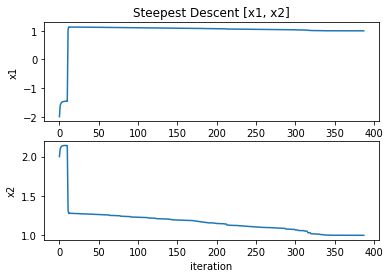

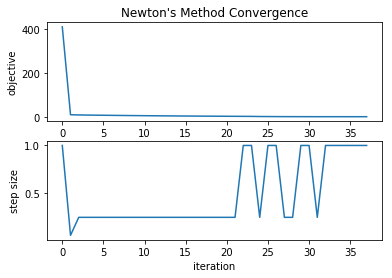

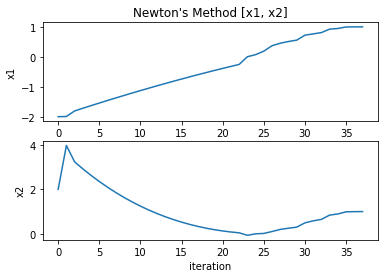

In [18]:
fig,(ax1,ax2) = plt.subplots(2,1)
t = np.arange(s_t.shape[0])
ax1.plot(s_o[:, 0], s_o[:, 1])
ax2.plot(t, s_t)

ax1.set(xlabel='iteration', ylabel='objective', title='Steepest Descent Convergence')
ax2.set(xlabel='iteration', ylabel='step size')
plt.show()

fig,(ax1,ax2) = plt.subplots(2,1)
t = np.arange(s_x.shape[0])
ax1.plot(t, s_x[:, 0])
ax2.plot(t, s_x[:, 1])

ax1.set(xlabel='iteration', ylabel='x1', title='Steepest Descent [x1, x2]')
ax2.set(xlabel='iteration', ylabel='x2')
plt.show()

fig,(ax1,ax2) = plt.subplots(2,1)
t = np.arange(n_t.shape[0])
ax1.plot(n_o[:, 0], n_o[:, 1])
ax2.plot(t, n_t)

ax1.set(xlabel='iteration', ylabel='objective', title="Newton's Method Convergence")
ax2.set(xlabel='iteration', ylabel='step size')
plt.show()

fig,(ax1,ax2) = plt.subplots(2,1)
t = np.arange(n_x.shape[0])
ax1.plot(t, n_x[:, 0])
ax2.plot(t, n_x[:, 1])

ax1.set(xlabel='iteration', ylabel='x1', title="Newton's Method [x1, x2]")
ax2.set(xlabel='iteration', ylabel='x2')
plt.show()